<a href="https://colab.research.google.com/github/Amit-27214/Neural-Art-Tasks/blob/main/Task3_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Segmentation Task 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
im =  cv2.imread('/content/peakpx.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(1603, 908, 3)


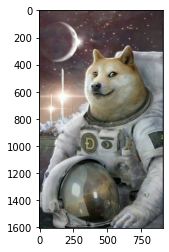

In [3]:
plt.imshow(im) # as RGB Format
plt.show()

In [4]:
# Flattening the image to convert multidimensinal to single dimesion
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(1455524, 3)


In [5]:
from sklearn.cluster import KMeans
clstr = 5  # cluster value to convert to desired segments  
km = KMeans(n_clusters= clstr)
km.fit(all_pixels)

KMeans(n_clusters=5)

In [6]:
centers = km.cluster_centers_
print(centers) # In RGB Format
# main RGB centers of segmented image

[[204.92555102 203.97449826 200.2519925 ]
 [ 83.39327224  74.23116205  71.87133895]
 [117.92810125 116.16319985 107.37089786]
 [159.52363245 157.98918767 152.73974298]
 [ 49.53969926  44.18902076  42.95778649]]


In [7]:
centers = np.array(centers,dtype='uint8')

In [8]:
print(centers)

[[204 203 200]
 [ 83  74  71]
 [117 116 107]
 [159 157 152]
 [ 49  44  42]]


Displaying the Possible Color Combination

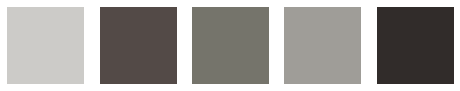

In [9]:
# displaying Main color components:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,clstr,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [10]:
new_img = np.zeros((1603*908,3),dtype='uint8') # flattened image
print(new_img.shape)

(1455524, 3)


In [11]:
colors

[array([204, 203, 200], dtype=uint8),
 array([83, 74, 71], dtype=uint8),
 array([117, 116, 107], dtype=uint8),
 array([159, 157, 152], dtype=uint8),
 array([49, 44, 42], dtype=uint8)]

In [12]:
km.labels_

array([4, 4, 4, ..., 1, 4, 4], dtype=int32)

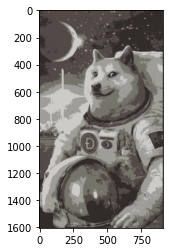

In [13]:
# Iterate over the image
#Displaying the segmented image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
